**Autor: Luiz F. S. Daros - ECOMP - POLI/UPE**
# Grafos de conhecimentos + Processamento de Linguagem Natural (PLN)



In [ ]:
# Instalar as bibliotecas necessárias
%pip install spacy==3.2.0 networkx matplotlib

# Baixar o modelo de linguagem do SpaCy (utilizando large para resultados mais precisos)
!python -m spacy download pt_core_news_lg

# Importando bibliotecas necessárias
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from operator import index

In [22]:
# Carregando o modelo de linguagem
nlp = spacy.load("pt_core_news_lg")

texto = """
    Luiz nasceu em Recife. Luiz estuda na POLI. A POLI fica em Recife. Luiz nasceu em 2004. Luis Carlos estudou na UFPE. Luis Carlos trabalha na POLI. 
    Cleyton se formou na POLI. Cleyton estudou na UFPE. A UFPE fica em Recife. Pedro tem amizade com Luiz. Pedro estuda na UFPE. Recife fica em Pernambuco.
    POLI faz parte da UPE. UPE recebe verba de Pernambuco. Luiz estuda E-COMP. Pedro estuda E-COMP. UFPE está cadastrada no MEC. 
    UPE está cadastrada no MEC. Rian estudou na UFRPE. David estudou na UNIBRATEC. UFPE recebe verba do GovFederal. UFRPE recebe verba do GovFederal. 
    UFRPE está cadastrada no MEC. O CIn fica na UFPE. Tsang-Ing-Ren é professor do CIn. Tsang-Ing-Ren orientou Hemir. Cleyton faz pesquisa de IA. Joabe pesquisa EngSoftware. 
    David faz pesquisa de AM. Hemir lecionou Luiz. Hemir lecionou David. Tsang-Ing-Ren trabalha na UFPE. Projeto-Motorola fica no CIn. Luiz trabalha no Projeto-Motorola. 
    Luiz trabalha com TestSoftware. TestSoftware representa subárea de EngSoftware. AM representa subárea de IA. Bruno faz pesquisa de AM. Tsang-Ing-Ren orientou Bruno. 
    Bruno lecionou Luiz. Cleyton lecionou Luiz. Cleyton lecionou Rian. Cleyton lecionou David. Rian trabalha com DevWeb. Hemir estudou UNICAP. Porto Digital oferta vagas para DevWeb. 
    Hemir trabalhou no Porto Digital. Roberto estuda CC. Roberto conhece Pedro. Roberto conhece Luiz. CIn oferta CC. CIn oferta ECOMP. PPGEC fica na POLI. Cleyton trabalha no PPGEC. 
    Hemir trabalha no PPGEC. PPGEC fica no Bloco C.  Victor trabalha no Projeto-Motorola. Victor estuda na CESAR. CESAR fica no Porto Digital. Victor estuda ADS. Roberta trabalha na POLI 
    Silvio Meira criou CESAR. Silvio Meira trabalhou na UFPE.Eduardo Peixoto chefia a CESAR. Porto Digital fica no Recife Antigo. Joabe estudou na UFPE. Luis Carlos faz pesquisa de Lógica. Joabe trabalha na POLI. 
    Roberta leciona Lógica. Paulo Borba dirige o CIn. Paulo Borba estudou na UFPE. Fernando Buarque faz pesquisa de IA. Fernando Buarque estudou na UNICAP. Fernando Buarque estudou na UFPE.
    Fernando Buarque estudou no Imperial College. Imperial College fica em Londres. Londres fica na Inglaterra. Pernambuco fica no Brasil. Brasil faz parte da ONU. Inglaterra faz parte da ONU.
"""

# Fazendo o PLN do texto dado como entrada
texto_processado = nlp(texto)

In [23]:
def identificar_relacoes(texto):
  
    relacoes = []

    for token in texto:
        if not token.is_punct:
            if token.dep_ == "ROOT" and token.pos_ == "VERB":      # Baseando no verbo raiz

                # Pegando núcleo do sujeito
                #sujeitos = [child.text for child in token.children if (child.dep_ in ("nsubj", "nsubj:pass"))]

                sujeitos = [
                    " ".join([descendant.text for descendant in child.subtree if not descendant.is_punct])
                    for child in token.children if child.dep_ in ("nsubj", "nsubj:pass")
                ]

                # Pegando predicados que comecem com letra maiúscula ou são númericos (facilita na hora de plotar, pois o conteúdo do vértice será apenas uma palavra)
                predicados = [ 
                    " ".join([descendant.text for descendant in child.subtree if descendant.text[0].isupper() or descendant.text.isnumeric()])  #pega predicados que comecem com letra maiúscula ou são númericos
                    for child in token.children if child.dep_ in ("attr", "obj", "obl", "advcl")  
                ]

                for sujeito in sujeitos:
                    for predicado in predicados:
                        verbo = token.text

                        if token.i + 1 < len(texto) and texto[token.i + 1].text not in predicados:   # Se o termo logo após o verbo não for o predicado, então o verbo precisa desse termo para fazer sentido (Verbo transitivo)
                            verbo = (verbo + " " + texto[token.i + 1].text)                          # Logo, para que as arestas do grafo apresentem relações corretas, devemos concatenar esse termo com o verbo

                        relacoes.append((sujeito, verbo, predicado))

                    
    return relacoes


relacoes = identificar_relacoes(texto_processado)

print("------------Relações encontradas------------")
for sujeito, verbo, predicado in relacoes:
    print(sujeito, "-->", verbo, "-->", predicado)
    


------------Relações encontradas------------
Luiz --> nasceu em --> Recife
Luiz --> estuda na --> POLI
A POLI --> fica em --> Recife
Luiz --> nasceu em --> 2004
Luis Carlos --> estudou na --> UFPE
Luis Carlos --> trabalha na --> POLI
Cleyton --> formou na --> POLI
Cleyton --> estudou na --> UFPE
A UFPE --> fica em --> Recife
Pedro --> tem amizade --> Luiz
Pedro --> estuda na --> UFPE
Recife --> fica em --> Pernambuco
POLI --> faz parte --> UPE
UPE --> recebe verba --> Pernambuco
Luiz --> estuda --> E-COMP
Pedro --> estuda --> E-COMP
Rian --> estudou na --> UFRPE
David --> estudou na --> UNIBRATEC
UFPE --> recebe verba --> GovFederal
UFRPE --> recebe verba --> GovFederal
O CIn --> fica na --> UFPE
Tsang-Ing-Ren --> orientou --> Hemir
Cleyton --> faz pesquisa --> IA
David --> faz pesquisa --> AM
Hemir --> lecionou --> Luiz
Hemir --> lecionou --> David
Tsang-Ing-Ren --> trabalha na --> UFPE
Projeto-Motorola --> fica no --> CIn
Luiz --> trabalha no --> Projeto-Motorola
Luiz --> trabalha co

Número total de vértices:  51
Número total de arestas:  71


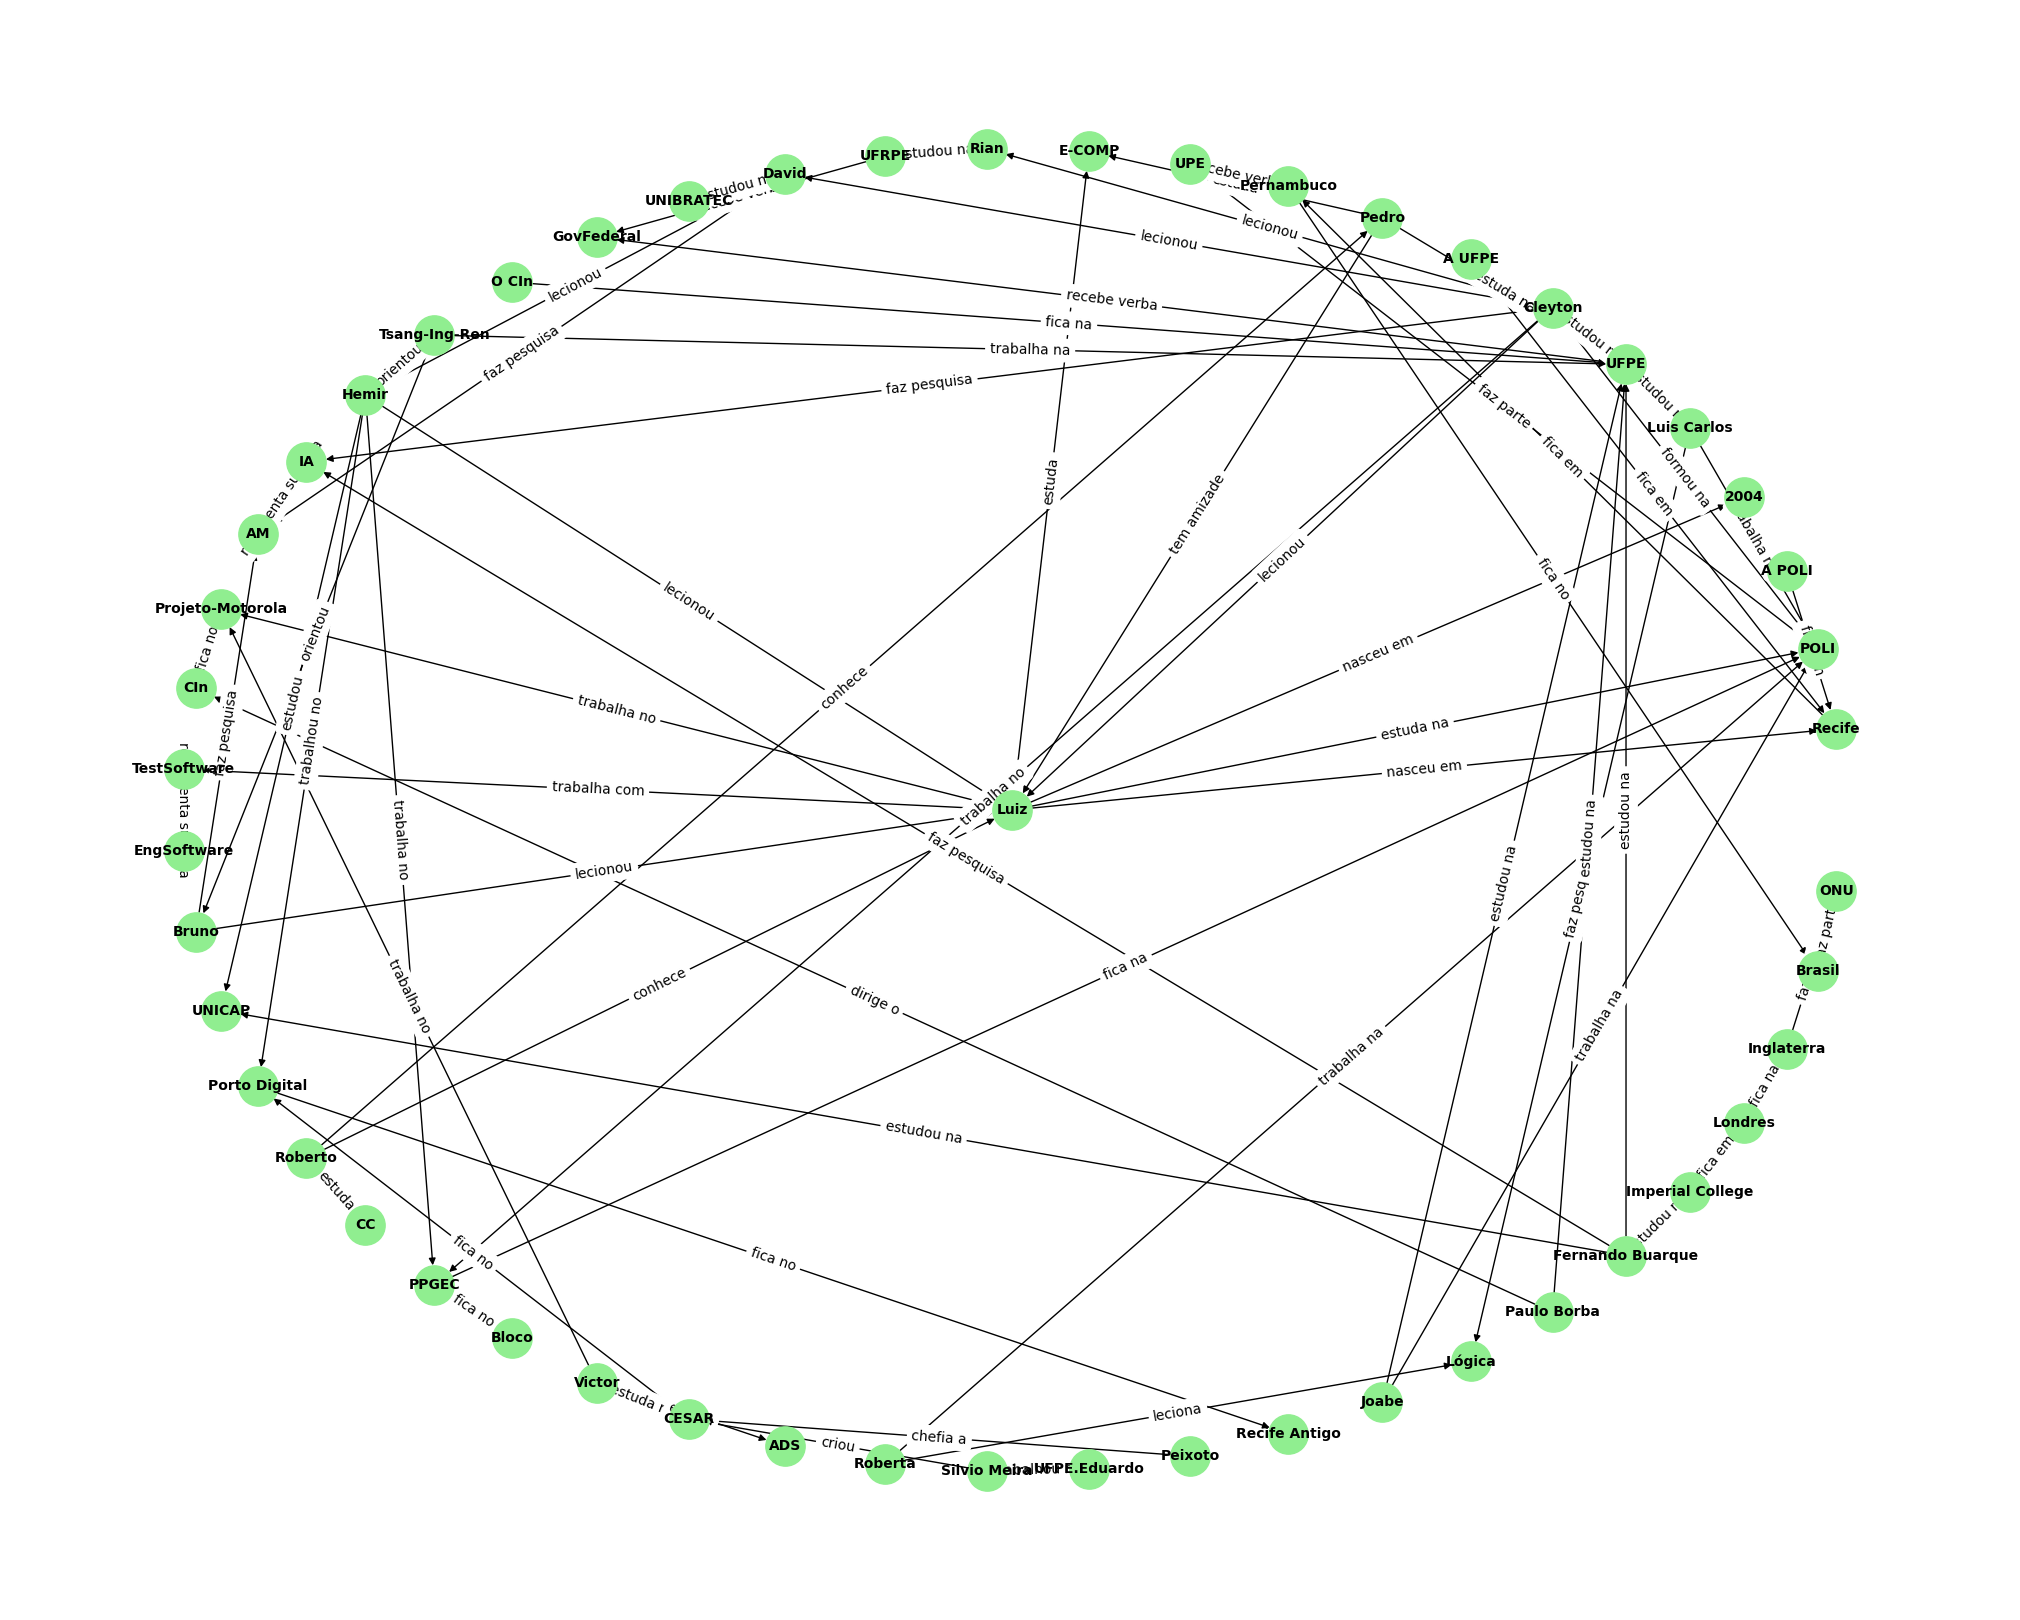

In [24]:
#Criando grafo de conhecimento
grafo = nx.DiGraph()

# Sujeito = vértice origem ; Predicado = vértice destino ; Relação(Verbo) = aresta
for sujeito, verbo, predicado in relacoes:
    grafo.add_edge(sujeito, predicado, label=verbo)
    

plt.figure(figsize=(20, 16))

pos = nx.circular_layout(grafo)

if "Luiz" in grafo.nodes:
    pos["Luiz"] = [0, 0]  # Definindo "Luiz" no centro
    
    # Ajustando as posições dos outros nós
    for node in pos:
        if node != "Luiz":
            pos[node] *= 1.5  # Distancia os outros nós para evitar sobreposição



nx.draw(
    grafo, pos,
    with_labels=True, 
    node_color='lightgreen', 
    node_size=800, 
    font_size= 10, 
    font_weight='bold'
)

edge_labels = nx.get_edge_attributes(grafo, 'label')

nx.draw_networkx_edge_labels(
    grafo, pos, 
    edge_labels = edge_labels, 
    font_size = 10, 
    font_color='black',
    verticalalignment = 'center', 
    horizontalalignment='center'
    ) 

nx.spring_layout(grafo,  k = 6) # aumentando espaçamento entre vértices

print("Número total de vértices: ", grafo.number_of_nodes())
print("Número total de arestas: ", grafo.number_of_edges())


plt.show()


**Operações com o grafo (utilizando a biblioteca Network X)**

In [29]:
def numVertices(g):
  return g.number_of_nodes()


def numArestas(g):
  return g.number_of_edges()


def grau(v, g):
  if v in g:
    return g.degree(v)
  else:
    print(f"O vértice {v} não está no grafo {g}")


def verticesAdjacentes(v, g):
  if v in g:
    return list(g.neighbors(v))
  else:
    print(f"O vértice {v} não está no grafo {g}")


def arestasIncidentes(v, g):
  if v in g:
    return list(g.edges(v))
  else:
    print(f"O vértice {v} não está no grafo {g}")


def saoAdjacentes(v1, v2, g):
        return g.has_edge(v1, v2)


def insereVertice(v, g):
  g.add_node(v)


def insereAresta(v1, v2, g, verbo):
  if v1 not in g:
      g.insereVertice(v1)
  if v2 not in g:
      g.insereVertice(v2)

  g.add_edge(v1, v2, label=verbo)
  

def removeVertice(v, g):
  if v not in g:
    print(f"O vértice {v} não está no grafo {g}")
  else:
    g.remove_node(v)

def removeAresta(v1, v2, g):
  if not g.has_edge(v1, v2):
    print(f"O vértice {v} não está no grafo {g}")
  else:
    g.remove_edge(v1, v2)



**TESTES**

Número total de vértices:  51
Número total de arestas:  65
Grau do vértice 'Teste' =  0
O vértice bbbb não está no grafo DiGraph with 51 nodes and 65 edges
None
'Bruno' e 'Luiz' são ajacentes?  True


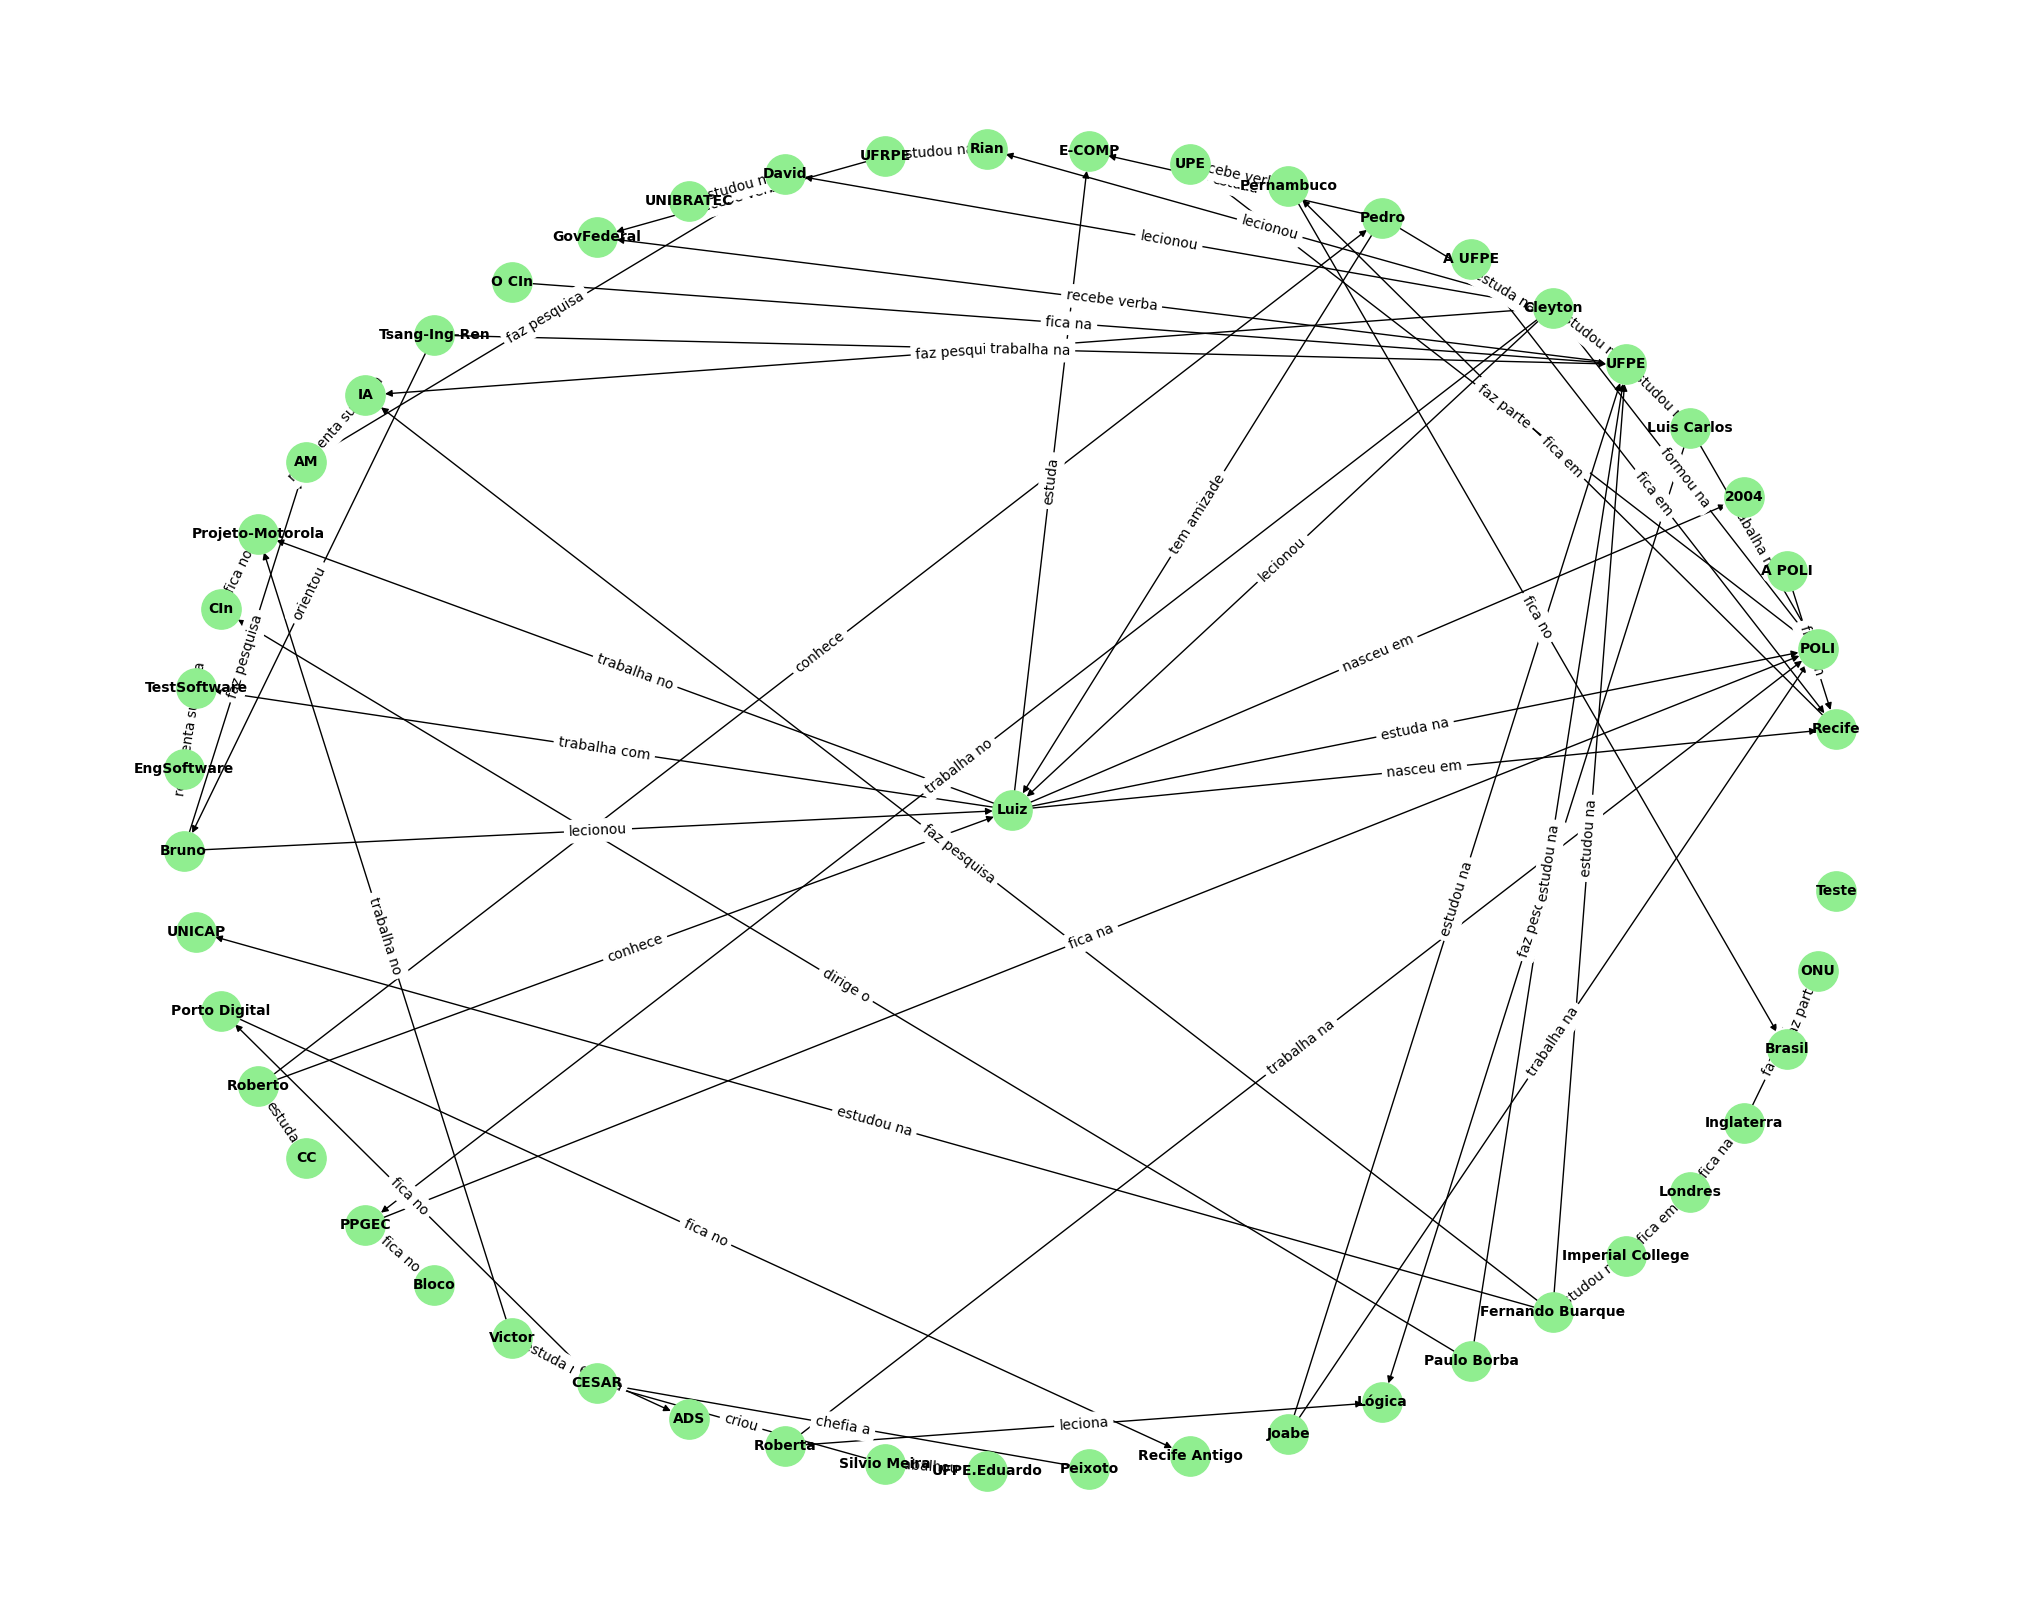

In [43]:
#Criando grafo de conhecimento
grafo = nx.DiGraph()

# Sujeito = vértice origem ; Predicado = vértice destino ; Relação(Verbo) = aresta
for sujeito, verbo, predicado in relacoes:
    grafo.add_edge(sujeito, predicado, label=verbo)
    
insereVertice("Teste", grafo)
removeVertice("Hemir", grafo)

plt.figure(figsize=(20, 16))

pos = nx.circular_layout(grafo)

if "Luiz" in grafo.nodes:
    pos["Luiz"] = [0, 0]  # Define "Luiz" no centro
    # Ajustar as posições dos outros nós
    for node in pos:
        if node != "Luiz":
            pos[node] *= 1.5  # Expande os outros nós para evitar sobreposição



nx.draw(
    grafo, pos,
    with_labels=True, 
    node_color='lightgreen', 
    node_size=800, 
    font_size= 10, 
    font_weight='bold'
)

edge_labels = nx.get_edge_attributes(grafo, 'label')

nx.draw_networkx_edge_labels(
    grafo, pos, 
    edge_labels = edge_labels, 
    font_size = 10, 
    font_color='black',
    verticalalignment = 'center', 
    horizontalalignment='center'
    ) 

nx.spring_layout(grafo,  k = 6) # Aumentando espaçamento entre vértices

print("Número total de vértices: ", numVertices(grafo))
print("Número total de arestas: ", numArestas(grafo))

print("Grau do vértice 'Teste' = ", grau("Teste", grafo))
print(grau("bbbb", grafo))

print("'Bruno' e 'Luiz' são ajacentes? ", saoAdjacentes("Bruno", "Luiz", grafo))




plt.show()